In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_classification
torch.manual_seed(123)

In [3]:
## Make a Toy Dataset
X,y=make_classification(n_samples=2000, n_features=4, n_classes=2)

### Change it into the Tensor 

X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)


In [4]:
X=torch.tensor(X,dtype=torch.float32)
X

<ipython-input-4-e59afa81085a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X=torch.tensor(X,dtype=torch.float32)


tensor([[ 1.1212,  0.1479,  0.8246, -0.8685],
        [-0.2974,  0.3400,  0.8816,  0.2331],
        [-1.9745,  0.7853,  1.5823,  1.5369],
        ...,
        [ 0.9374,  0.3093,  1.2279, -0.7248],
        [-1.2990,  0.6074,  1.3044,  1.0118],
        [ 1.3005, -0.4396, -0.8169, -1.0118]])

In [5]:
y=torch.tensor(y,dtype=torch.float32)
y

<ipython-input-5-68a9c533288e>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.float32)


tensor([1., 1., 1.,  ..., 1., 1., 0.])

In [6]:
### Data Suffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([ 937, 1311,  152,  727,  340, 1465, 1485, 1629,    9,  838])

In [7]:
#### Train Test split
train_size=int(suffle_idx.size(0)*0.9)
train_idx= suffle_idx[:train_size]

test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [8]:
X_train.shape

torch.Size([1800, 4])

In [9]:
X_test.shape

torch.Size([200, 4])

In [10]:
#### Normalize

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [11]:
import torch.nn as nn
from torch.autograd import grad

In [12]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**10)


In [13]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost




In [14]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=100)

Epoc:   1 | MSE  0.12259
Epoc:   2 | MSE  0.07369
Epoc:   3 | MSE  0.05274
Epoc:   4 | MSE  0.04093
Epoc:   5 | MSE  0.03330
Epoc:   6 | MSE  0.02796
Epoc:   7 | MSE  0.02402
Epoc:   8 | MSE  0.02100
Epoc:   9 | MSE  0.01861
Epoc:  10 | MSE  0.01667
Epoc:  11 | MSE  0.01507
Epoc:  12 | MSE  0.01374
Epoc:  13 | MSE  0.01260
Epoc:  14 | MSE  0.01163
Epoc:  15 | MSE  0.01078
Epoc:  16 | MSE  0.01004
Epoc:  17 | MSE  0.00939
Epoc:  18 | MSE  0.00881
Epoc:  19 | MSE  0.00829
Epoc:  20 | MSE  0.00782
Epoc:  21 | MSE  0.00740
Epoc:  22 | MSE  0.00702
Epoc:  23 | MSE  0.00668
Epoc:  24 | MSE  0.00636
Epoc:  25 | MSE  0.00607
Epoc:  26 | MSE  0.00580
Epoc:  27 | MSE  0.00556
Epoc:  28 | MSE  0.00533
Epoc:  29 | MSE  0.00512
Epoc:  30 | MSE  0.00492
Epoc:  31 | MSE  0.00474
Epoc:  32 | MSE  0.00457
Epoc:  33 | MSE  0.00441
Epoc:  34 | MSE  0.00426
Epoc:  35 | MSE  0.00412
Epoc:  36 | MSE  0.00399
Epoc:  37 | MSE  0.00386
Epoc:  38 | MSE  0.00375
Epoc:  39 | MSE  0.00363
Epoc:  40 | MSE  0.00353


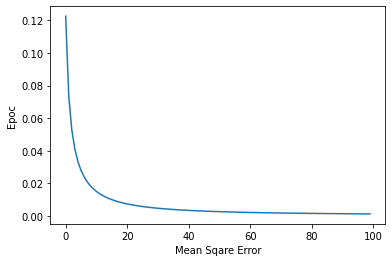

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.xlabel('Mean Sqare Error')
plt.ylabel('Epoc')
plt.show()

In [16]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.6,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 52.22
Testing Accuracy: 69.00


### Model Using Pytorch

In [17]:
import torch
import sklearn
import torch.nn.functional as F

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5, random_state=25)
print(X_train.shape)

torch.Size([500, 4])


In [21]:
print(X_test.shape)

torch.Size([500, 4])


In [22]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)    

In [23]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [24]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [25]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.42916
Epoc:   2 | MSE  0.35085
Epoc:   3 | MSE  0.29075
Epoc:   4 | MSE  0.24423
Epoc:   5 | MSE  0.20796
Epoc:   6 | MSE  0.17948
Epoc:   7 | MSE  0.15697
Epoc:   8 | MSE  0.13909
Epoc:   9 | MSE  0.12482
Epoc:  10 | MSE  0.11338
Epoc:  11 | MSE  0.10420
Epoc:  12 | MSE  0.09681
Epoc:  13 | MSE  0.09086
Epoc:  14 | MSE  0.08608
Epoc:  15 | MSE  0.08224
Epoc:  16 | MSE  0.07917
Epoc:  17 | MSE  0.07673
Epoc:  18 | MSE  0.07481
Epoc:  19 | MSE  0.07332
Epoc:  20 | MSE  0.07217
Epoc:  21 | MSE  0.07130
Epoc:  22 | MSE  0.07066
Epoc:  23 | MSE  0.07022
Epoc:  24 | MSE  0.06991
Epoc:  25 | MSE  0.06973
Epoc:  26 | MSE  0.06966
Epoc:  27 | MSE  0.06966
Epoc:  28 | MSE  0.06970
Epoc:  29 | MSE  0.06978
Epoc:  30 | MSE  0.06990
Epoc:  31 | MSE  0.07002
Epoc:  32 | MSE  0.07014
Epoc:  33 | MSE  0.07026
Epoc:  34 | MSE  0.07039
Epoc:  35 | MSE  0.07049
Epoc:  36 | MSE  0.07059
Epoc:  37 | MSE  0.07065
Epoc:  38 | MSE  0.07071
Epoc:  39 | MSE  0.07073
Epoc:  40 | MSE  0.07073


[]

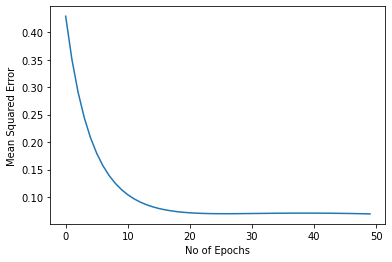

In [26]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [27]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.82
Testing Accuracy: 0.85


### Logistic Regression

In [28]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [29]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [30]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.50227
Epoc:   2 | MSE  0.47541
Epoc:   3 | MSE  0.45117
Epoc:   4 | MSE  0.42932
Epoc:   5 | MSE  0.40965
Epoc:   6 | MSE  0.39199
Epoc:   7 | MSE  0.37617
Epoc:   8 | MSE  0.36205
Epoc:   9 | MSE  0.34949
Epoc:  10 | MSE  0.33840
Epoc:  11 | MSE  0.32866
Epoc:  12 | MSE  0.32020
Epoc:  13 | MSE  0.31293
Epoc:  14 | MSE  0.30680
Epoc:  15 | MSE  0.30173
Epoc:  16 | MSE  0.29770
Epoc:  17 | MSE  0.29465
Epoc:  18 | MSE  0.29255
Epoc:  19 | MSE  0.29138
Epoc:  20 | MSE  0.29111
Epoc:  21 | MSE  0.29173
Epoc:  22 | MSE  0.29323
Epoc:  23 | MSE  0.29561
Epoc:  24 | MSE  0.29886
Epoc:  25 | MSE  0.30299
Epoc:  26 | MSE  0.30801
Epoc:  27 | MSE  0.31393
Epoc:  28 | MSE  0.32077
Epoc:  29 | MSE  0.32854
Epoc:  30 | MSE  0.33726
Epoc:  31 | MSE  0.34697
Epoc:  32 | MSE  0.35770
Epoc:  33 | MSE  0.36946
Epoc:  34 | MSE  0.38232
Epoc:  35 | MSE  0.39628
Epoc:  36 | MSE  0.41142
Epoc:  37 | MSE  0.42775
Epoc:  38 | MSE  0.44534
Epoc:  39 | MSE  0.46424
Epoc:  40 | MSE  0.48449


[]

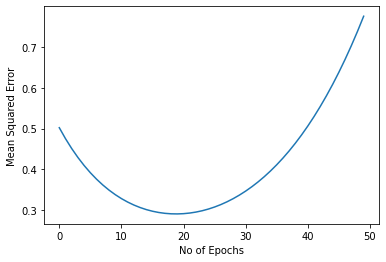

In [31]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [32]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.55
Testing Accuracy: 0.60
